In [39]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [40]:
df_us_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_us_da = df_us_da.dropna(subset=['salary_year_avg'])

<Axes: >

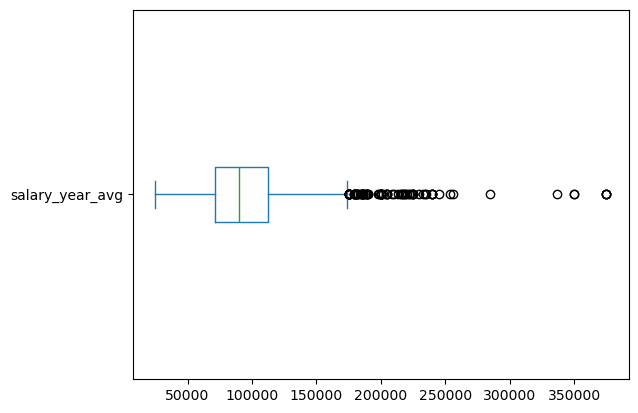

In [41]:
df_us_da['salary_year_avg'].plot(kind='box', vert=False)

In [42]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

C:\Users\USER\AppData\Local\Temp\ipykernel_11500\494094735.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


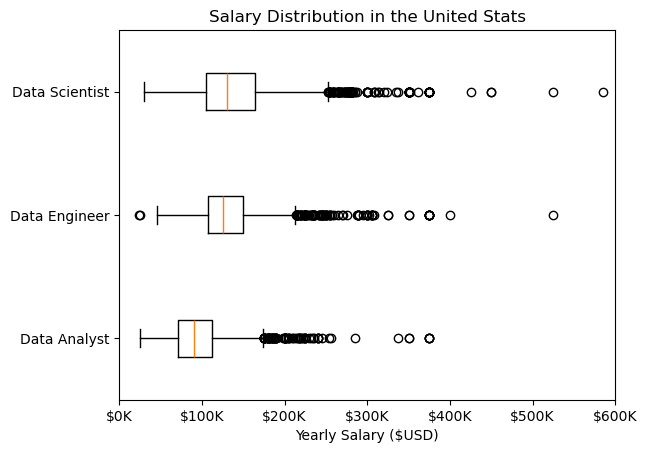

In [43]:
plt.boxplot(job_list, labels=job_titles, vert=False)
plt.title('Salary Distribution in the United Stats')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

## Practice Problems

### Data Scientist Hourly Salary Box Plot
Create a box plot to visualize the distribution of salary_hour_avg for Data Scientist job postings in the United States. Label the x-axis as 'Data Scientist' and the y-axis as 'Hourly Salary ($USD)'.

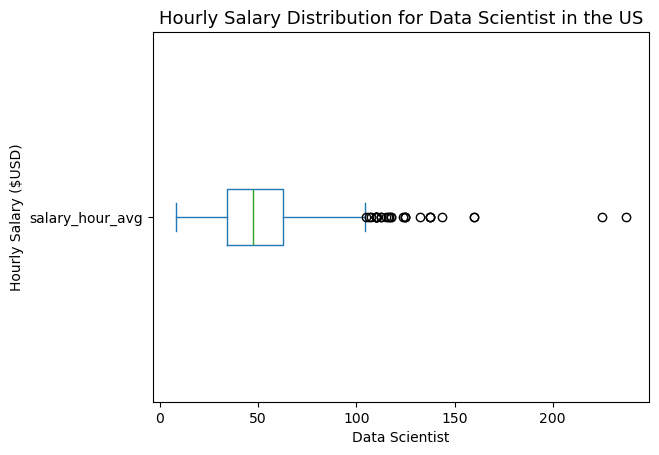

In [44]:
df_us_ds = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Scientist')].copy()
df_us_ds = df_us_ds.dropna(subset='salary_hour_avg')
df_us_ds['salary_hour_avg'].plot(kind='box', vert=False)
plt.title('Hourly Salary Distribution for Data Scientist in the US', fontsize=13)
plt.xlabel('Data Scientist')
plt.ylabel('Hourly Salary ($USD)')
plt.show()

### Comparison of Hourly Salaries for Data Analyst
Create a box plot to compare the distribution of salary_hour_avg for Data Analyst job postings in the United States and Canada.

- Filter a DataFrame to include only 'Data Analyst' roles in these two countries.
- Use list comprehension to create a list of DataFrames for each country.
- Use the plt.boxplot() function to plot this list and specify the labels as countries.
- Set the y-axis limit to 150 and the y-axis as 'Hourly Salary ($USD)'.

C:\Users\USER\AppData\Local\Temp\ipykernel_11500\3480545911.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(country_list, labels=job_countries, vert=False)


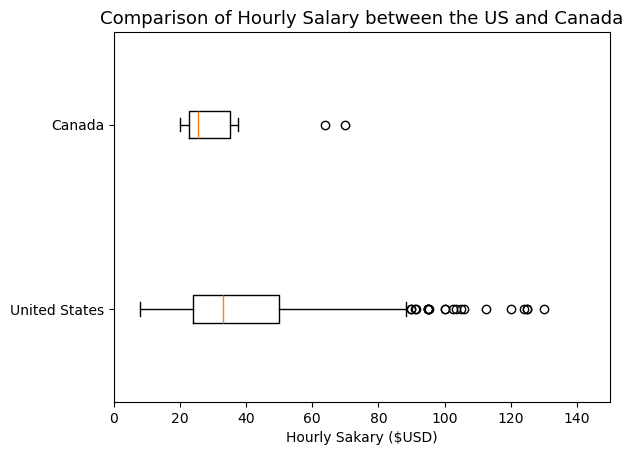

In [45]:
job_countries = ['United States', 'Canada']

df_na_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'].isin(job_countries))].copy()
df_na_da = df_na_da.dropna(subset='salary_hour_avg')

country_list = [df_na_da[df_na_da['job_country'] == country]['salary_hour_avg'] for country in job_countries]

plt.boxplot(country_list, labels=job_countries, vert=False)
plt.title('Comparison of Hourly Salary between the US and Canada', fontsize=13)
plt.xlabel('Hourly Sakary ($USD)')
plt.ylabel('')
plt.xlim(0, 150)
plt.show()

### Comparison of Hourly Salaries in Canada
- Create a box plot to compare the distribution of salary_hour_avg for Data Analyst, Data Engineer, and Data Scientist job postings in Canada.
- Label the x-axis as 'Job Title' and format the y-axis to have '$' before the number then label it as 'Hourly Salary (USD)'.

C:\Users\USER\AppData\Local\Temp\ipykernel_11500\2514090454.py:7: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(title_list, labels=job_titles, vert=False)


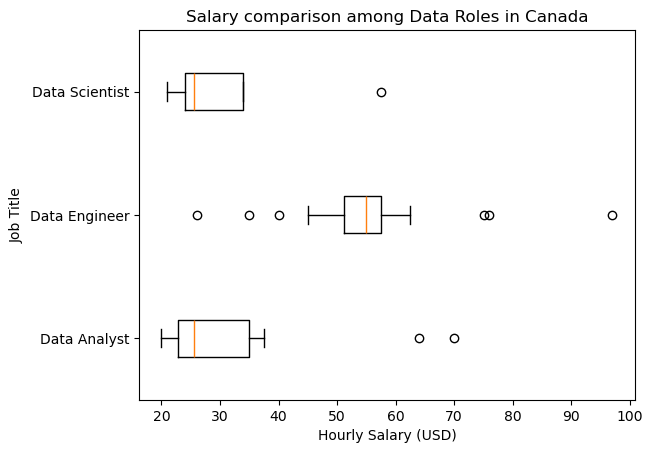

In [46]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_ca = df[(df['job_country'] == 'Canada') & df['job_title_short'].isin(job_titles)]
df_ca = df_ca.dropna(subset='salary_hour_avg')

title_list = [df_ca[df_ca['job_title_short'] == title]['salary_hour_avg'] for title in job_titles]
plt.boxplot(title_list, labels=job_titles, vert=False)
plt.title('Salary comparison among Data Roles in Canada')
plt.xlabel('Hourly Salary (USD)')
plt.ylabel('Job Title')
plt.show()

#### Alternative Solution

C:\Users\USER\AppData\Local\Temp\ipykernel_11500\378080469.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot(title_list, labels=job_titles, vert=False)


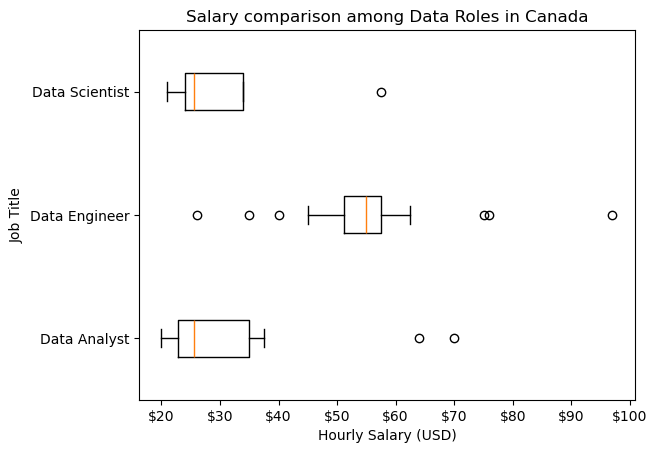

In [47]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_ca = df[(df['job_country'] == 'Canada') & df['job_title_short'].isin(job_titles)]
df_ca = df_ca.dropna(subset='salary_hour_avg')

title_list = [df_ca[df_ca['job_title_short'] == title]['salary_hour_avg'] for title in job_titles]

fig, ax = plt.subplots()
ax.boxplot(title_list, labels=job_titles, vert=False)
ax.set_title('Salary comparison among Data Roles in Canada')
ax.set_xlabel('Hourly Salary (USD)')
ax.set_ylabel('Job Title')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x)}'))
plt.show()